In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### 파일 불러오기

In [4]:
input_fd = open('C:/Users/RYEJ/Documents/data/youtube-new/KRvideos.csv',errors = 'backslashreplace',encoding='utf-8')
KR = pd.read_csv(input_fd, sep=',')

input_fd = open('C:/Users/RYEJ/Documents/data/youtube-new/JPvideos.csv', errors = 'backslashreplace',encoding='utf-8')
JP = pd.read_csv(input_fd, sep=',')

US = pd.read_csv('C:/Users/RYEJ/Documents/data/youtube-new/USvideos.csv', sep=',')

#### 파일이 잘 입력되었는지, 문자 깨짐은 없는지 확인 

In [5]:
print(KR.shape)
print(JP.shape)
print(US.shape)

(34567, 16)
(20523, 16)
(40949, 16)


In [6]:
print(KR.head())
print(JP.head())
print(US.head())

      video_id trending_date                       title channel_title  \
0  RxGQe4EeEpA      17.14.11          좋아 by 민서_윤종신_좋니 답가        라푸마코리아   
1  hH7wVE8OlQ0      17.14.11            JSA 귀순 북한군 총격 부상        Edward   
2  9V8bnWUmE9U      17.14.11  나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼)     나몰라패밀리 핫쇼   
3  0_8py-t5R80      17.14.11  이명박 출국 현장, 놓치면 안되는 장면         미디어몽구   
4  bk55RbxiQdI      17.14.11     김장겸은 물러갔다 MBC 노조 환호와 눈물        NocutV   

   category_id              publish_time  \
0           22  2017-11-13T07:07:36.000Z   
1           25  2017-11-13T10:59:16.000Z   
2           22  2017-11-11T07:16:08.000Z   
3           25  2017-11-12T11:19:52.000Z   
4           25  2017-11-13T11:08:59.000Z   

                                                tags   views  likes  dislikes  \
0                      라푸마|"윤종신"|"좋니"|"좋아"|"샬레"|"민서"  156130   1422        40   
1        JSA|"귀순"|"북한군"|"총격"|"부상"|"JSA 귀순 북한군 총격 부상"   76533    211        28   
2                아디다스|"빼빼로"|"핫쇼"|"나몰라패밀리"|"대학로"

#### 변수명 확인

In [7]:
print(KR.columns)
print(JP.columns)
print(US.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')
Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')
Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


#### 전처리

In [8]:
KR_cut=pd.DataFrame(KR[['video_id','category_id','views','likes','dislikes','comment_count']])
JP_cut=pd.DataFrame(JP[['video_id','category_id','views','likes','dislikes','comment_count']])
US_cut=pd.DataFrame(US[['video_id','category_id','views','likes','dislikes','comment_count']])
KR_cut['Country']='KR'
JP_cut['Country']='JP'
US_cut['Country']='US'
print(KR_cut.head())

      video_id  category_id   views  likes  dislikes  comment_count Country
0  RxGQe4EeEpA           22  156130   1422        40            272      KR
1  hH7wVE8OlQ0           25   76533    211        28            113      KR
2  9V8bnWUmE9U           22  421409   5112       166            459      KR
3  0_8py-t5R80           25  222850   2093       173           1219      KR
4  bk55RbxiQdI           25   84466   1094       109            450      KR


In [9]:
data = pd.concat([KR_cut,JP_cut,US_cut])
print(data.shape)

(96039, 7)


# 목표(확인하고 싶은 insight)
1. 평균 like 수 
2. 일정 like 수 이상인 글의 비율
3. like/dislike 비율
4. category별 평균 views
5. top 5 view category
6. comment count/views 비율
7. likes views 관계

* 전체 국가를 고려하지 않고 한, 미, 일 세 개의 국가만 분석 대상으로 선택

## 1. 평균 like 수 알아보기

In [8]:
print(KR.loc[:,"likes"].mean())
print(JP.loc[:,"likes"].mean())
print(US.loc[:,"likes"].mean())  

12186.41802875575
8059.586707596355
74266.7024347359


평균 like 수는 미국이 가장 높음

## 2 일정 like 수 (100,000)이상인 글의 비율
### 2-1 전체 글의 수

In [10]:
print(KR.shape)
print(JP.shape)
print(US.shape)       

(34567, 16)
(20523, 16)
(40949, 16)


전체 글의 수는 미국 > 한국 > 일본 순으로 많음

### 2-2. 일정 like 수(100,000) 이상인 글의 수

In [13]:
print(np.count_nonzero(KR.loc[:,"likes"] >= 100000))
print(np.count_nonzero(JP.loc[:,"likes"] >= 100000))
print(np.count_nonzero(US.loc[:,"likes"] >= 100000))

551
250
6586


like의 수가 10만 개가 넘는 글 역시 미국이 가장 많음

### 2-3. like의 수가 100,000 이상인 글의 비율

In [16]:
print(np.count_nonzero(KR.loc[:,"likes"] >= 100000) / KR.shape[0] *100)
print(np.count_nonzero(JP.loc[:,"likes"] >= 100000) / JP.shape[0] *100)
print(np.count_nonzero(US.loc[:,"likes"] >= 100000) / US.shape[0] * 100)

1.594005843723783
1.2181454952979585
16.083420840557768


like의 수가 100,000이 넘는 글의 비율은 미국이 가장 높다.

# 3. like/dislike 비율

### 3-1. 나라별 dislike의 평균

In [17]:
print(KR.loc[:,"dislikes"].mean())
print(JP.loc[:,"dislikes"].mean())
print(US.loc[:,"dislikes"].mean())

539.097954696676
366.82361253228083
3711.400888910596


### 3-2. 나라별 총 like의 수 , dislike의 수

In [18]:
print(KR.loc[:,"likes"].sum())
print(JP.loc[:,"likes"].sum())
print(US.loc[:,"likes"].sum())

421247912
165406898
3041147198


In [19]:
print(KR.loc[:,"dislikes"].sum())
print(JP.loc[:,"dislikes"].sum())
print(US.loc[:,"dislikes"].sum())

18634999
7528321
151978155


### 3-3.  나라별 총 like의 수와 dislike 수의 비율

In [20]:
print((KR.loc[:,"dislikes"].sum()) / (KR.loc[:,"likes"].sum()))
print((JP.loc[:,"dislikes"].sum()) / (JP.loc[:,"likes"].sum()))
print((US.loc[:,"dislikes"].sum()) / (US.loc[:,"likes"].sum()))

print("\n")
print((KR.loc[:,"likes"].sum()) / (KR.loc[:,"dislikes"].sum()))
print((JP.loc[:,"likes"].sum()) / (JP.loc[:,"dislikes"].sum()))
print((US.loc[:,"likes"].sum()) / (US.loc[:,"dislikes"].sum()))

0.044237605621651126
0.04551394827560336
0.049973955584901614


22.605201749675437
21.971286559114574
20.010423195359884


한국의 like가 가장 후하다

### 3-4. 전체에서 dislike의 비율

In [21]:
print((KR.loc[:,"dislikes"].sum()) / KR.shape[0])
print((JP.loc[:,"dislikes"].sum()) / JP.shape[0])
print((US.loc[:,"dislikes"].sum()) / US.shape[0])

539.097954696676
366.82361253228083
3711.400888910596


### 3-5. 전체에서 like의 비율

In [24]:
print((KR.loc[:,"likes"].sum()) / KR.shape[0])
print((JP.loc[:,"likes"].sum()) / JP.shape[0])
print((US.loc[:,"likes"].sum()) / US.shape[0])

12186.41802875575
8059.586707596355
74266.7024347359


### 3-6. dislike의 수 / (like의 수+dislike의 수)

In [25]:
print(KR.loc[:,"dislikes"].sum()/(KR.loc[:,"dislikes"].sum()+KR.loc[:,"likes"].sum()))
print(JP.loc[:,"dislikes"].sum()/(JP.loc[:,"dislikes"].sum()+JP.loc[:,"likes"].sum()))
print(US.loc[:,"dislikes"].sum()/(US.loc[:,"dislikes"].sum()+US.loc[:,"likes"].sum()))

0.04236354387497449
0.04353260743261325
0.04759542398083862


## 4.category별 평균 views
각 국가에서 카테고리별 평균 조회수 확인

각 국가의 category_id, views 변수만 추출한 데이터를 만든다.

In [6]:
KR_C = KR.loc[:,['category_id', 'views']]
JP_C = JP.loc[:,['category_id', 'views']]
US_C = US.loc[:,['category_id', 'views']]

NA 확인

In [7]:
print(np.count_nonzero(KR_C.isnull()))
print(np.count_nonzero(JP_C.isnull()))
print(np.count_nonzero(US_C.isnull()))

0
0
0


In [8]:
print(KR_C.count())
print(JP_C.count())
print(US_C.count())

category_id    34567
views          34567
dtype: int64
category_id    20523
views          20523
dtype: int64
category_id    40949
views          40949
dtype: int64


In [9]:
print(np.sort(KR_C['category_id'].unique()))
print(np.sort(JP_C['category_id'].unique()))
print(np.sort(US_C['category_id'].unique()))

[ 1  2 10 15 17 19 20 22 23 24 25 26 27 28 29 43 44]
[ 1  2 10 15 17 19 20 22 23 24 25 26 27 28 29]
[ 1  2 10 15 17 19 20 22 23 24 25 26 27 28 29 43]


In [10]:
KR_C.rename(columns = {'views' : 'views_KR'}, inplace = True)
KR_Cmean = KR_C.groupby('category_id').mean()
JP_C.rename(columns = {'views' : 'views_JP'}, inplace = True)
JP_Cmean = JP_C.groupby('category_id').mean()
US_C.rename(columns = {'views' : 'views_US'}, inplace = True)
US_Cmean = US_C.groupby('category_id').mean()

In [11]:
print(KR_Cmean)
print(JP_Cmean)
print(US_Cmean)

                 views_KR
category_id              
1            5.440154e+05
2            1.198672e+05
10           2.080543e+06
15           2.022284e+05
17           5.987503e+05
19           2.405090e+05
20           2.814424e+05
22           2.098027e+05
23           3.598452e+05
24           5.103813e+05
25           1.546775e+05
26           3.146176e+05
27           1.511617e+05
28           2.685160e+06
29           6.316461e+04
43           1.062983e+05
44           1.664950e+04
                 views_JP
category_id              
1            2.554023e+05
2            8.319242e+04
10           8.297243e+05
15           6.271681e+04
17           2.850889e+05
19           1.032965e+05
20           1.684717e+05
22           1.500606e+05
23           3.781614e+05
24           2.821966e+05
25           1.338265e+05
26           1.356909e+05
27           8.666788e+04
28           1.213748e+06
29           9.003361e+04
                 views_US
category_id              
1           

## 5.top 5 view category
세 국가에서 인기있는 카테고리를 비교하고 평균적으로 인기있는 카테고리 알아보기

In [12]:
CTGRY = pd.merge(KR_Cmean, JP_Cmean, on = 'category_id')
CTGRY = pd.merge(CTGRY, US_Cmean, on = 'category_id')

In [13]:
CTGRY['views_KR'] = CTGRY['views_KR']/100000
CTGRY['views_JP'] = CTGRY['views_JP']/100000
CTGRY['views_US'] = CTGRY['views_US']/100000
CTGRY['views_mean'] = (CTGRY['views_KR'] + CTGRY['views_JP'] + CTGRY['views_US'])/3
print(CTGRY.shape)
print(CTGRY)
#조회수 단위는 십만.

(15, 4)
              views_KR   views_JP   views_US  views_mean
category_id                                             
1             5.440154   2.554023  31.062502   13.018893
2             1.198672   0.831924  13.559654    5.196750
10           20.805435   8.297243  62.010031   30.370903
15            2.022284   0.627168   8.311435    3.653629
17            5.987503   2.850889  20.259690    9.699361
19            2.405090   1.032965   8.546196    3.994750
20            2.814424   1.684717  26.208306   10.235816
22            2.098027   1.500606  15.318354    6.305662
23            3.598452   3.781614  14.803084    7.394383
24            5.103813   2.821966  20.678832    9.534870
25            1.546775   1.338265   5.925877    2.936972
26            3.146176   1.356909   9.837301    4.780128
27            1.511617   0.866679   7.129408    3.169234
28           26.851597  12.137482  14.526267   17.838449
29            0.631646   0.900336  29.638841   10.390274


세 국가의 유튜브 조회수가 크게 차이가 난다.  
10번 카테고리는 세 국가 모두 높은 조회수를 기록한다.  
한국에서는 특히 28번 카테고리 조회수가 높고 미국은 1번, 29번이 높다.  
28번은 한국과 일본 모두 조회수가 높은 데 반해 미국에서는 오히려 조회수가 낮다.

## 6.comment count/views 비율
### 6-1. 한국

      video_id  category_id   views  likes  dislikes  comment_count Country  \
0  RxGQe4EeEpA           22  156130   1422        40            272      KR   
1  hH7wVE8OlQ0           25   76533    211        28            113      KR   
2  9V8bnWUmE9U           22  421409   5112       166            459      KR   
3  0_8py-t5R80           25  222850   2093       173           1219      KR   
4  bk55RbxiQdI           25   84466   1094       109            450      KR   

         cv  
0  0.001742  
1  0.001476  
2  0.001089  
3  0.005470  
4  0.005328  


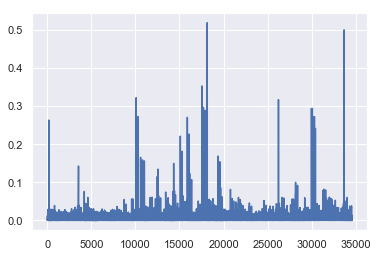

In [10]:
KR_cut['cv']=KR_cut.comment_count/KR_cut.views
print(KR_cut.head())
KR_cut.cv.plot()

category별, nation별과 같이 항목을 좁혀 보는 것이 더 유의미할 것으로 보인다.

### 6-2. 세 국가 통합

      video_id  category_id   views  likes  dislikes  comment_count Country  \
0  RxGQe4EeEpA           22  156130   1422        40            272      KR   
1  hH7wVE8OlQ0           25   76533    211        28            113      KR   
2  9V8bnWUmE9U           22  421409   5112       166            459      KR   
3  0_8py-t5R80           25  222850   2093       173           1219      KR   
4  bk55RbxiQdI           25   84466   1094       109            450      KR   

         cv  
0  0.001742  
1  0.001476  
2  0.001089  
3  0.005470  
4  0.005328  


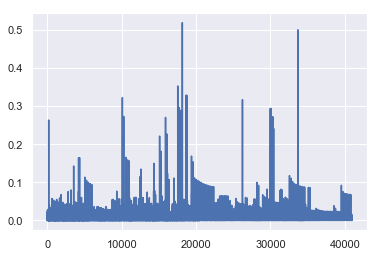

In [11]:
data['cv']=data.comment_count/data.views
print(data.head())
data.cv.plot()

In [13]:
print((data.loc[:,"comment_count"].sum()) / (data.loc[:,"views"].sum())*100)

0.37729376806936316


### 6-3.views, comment_count 관계

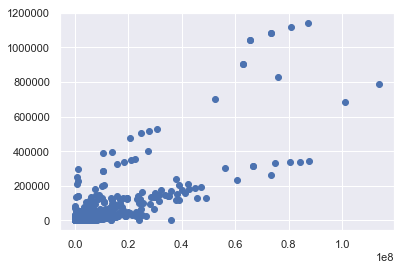

In [36]:
plt.scatter(KR_cut.views,KR_cut.comment_count)
plt.show()

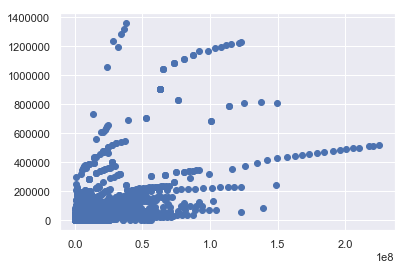

In [37]:
plt.scatter(data.views,data.comment_count)
plt.show()

## 7.likes, views 관계

C:\Users\RYEJ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


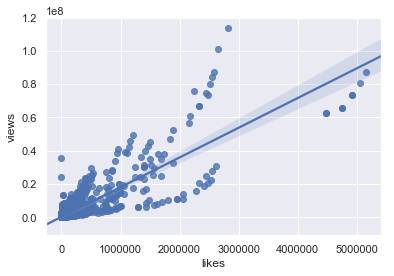

In [38]:
sns.regplot("likes","views",data=KR_cut);

C:\Users\RYEJ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


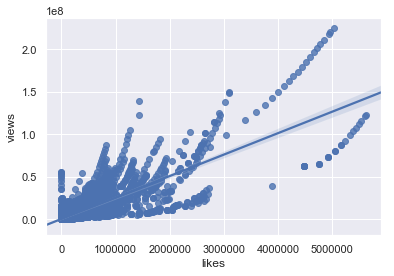

In [39]:
sns.regplot("likes","views",data=data);

likes와 views는 연관이 있다. 선형보단 비선형 회귀가 더 적합해보임. 